# **Colab安裝OpenVINO並下載執行mobilenet-v1影像分類quickstart範例**

範例提供：OmniXRI Jack 2020.9.10

主要工作項目：

1.   檢查系統
2.   安裝OpenVINO工具包
3.   模型下載
4.   模型優化
5.   執行推論

參考範例來源：https://colab.research.google.com/drive/1-ETOSlDftRCkAW4FoBHGLgslfaRMRqBU

# **0. 檢查系統**

In [1]:
# 檢查CPU狀態
# 預設會分配到 Intel Xeon CPU x64 2.2GHz 二顆
# OpenVINO只支援虛擬機的Intel CPU Xeon，不支援虛擬機的Nvidia GPU或Google TPU
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               79
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:            0
CPU MHz:             2200.000
BogoMIPS:            4400.00
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            56320K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_sin

In [2]:
# 檢查作業系統狀態
# 預設會分配到 Ubuntu 18.04.3 LTS版本
!cat /etc/os-release

NAME="Ubuntu"
VERSION="18.04.3 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.3 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic


# **1. 安裝Intel OpenVINO工具包**

In [3]:
# 取得OpenVINO2020公開金錀
!wget https://apt.repos.intel.com/openvino/2020/GPG-PUB-KEY-INTEL-OPENVINO-2020

--2020-09-10 03:03:03--  https://apt.repos.intel.com/openvino/2020/GPG-PUB-KEY-INTEL-OPENVINO-2020
Resolving apt.repos.intel.com (apt.repos.intel.com)... 104.90.255.179, 2600:1409:6800:186::4b23, 2600:1409:6800:18c::4b23
Connecting to apt.repos.intel.com (apt.repos.intel.com)|104.90.255.179|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 939 [binary/octet-stream]
Saving to: ‘GPG-PUB-KEY-INTEL-OPENVINO-2020’

GPG-PUB-KEY-INTEL-O 100%[===================>]     939  --.-KB/s    in 0s      

2020-09-10 03:03:04 (10.4 MB/s) - ‘GPG-PUB-KEY-INTEL-OPENVINO-2020’ saved [939/939]



In [4]:
# 加入OpenVINO公開金錀到系統金錀群中
!apt-key add GPG-PUB-KEY-INTEL-OPENVINO-2020

OK


In [5]:
# 建立更新安裝清單檔案
!touch /etc/apt/sources.list.d/intel-openvino-2020.list

In [6]:
# 將下載指令加入安裝清單中
!echo "deb https://apt.repos.intel.com/openvino/2020 all main" >> /etc/apt/sources.list.d/intel-openvino-2020.list

In [7]:
# 更新系統
!apt update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://apt.repos.intel.com/openvino/2020 all InRelease [5,659 B]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [95.7 kB]
Hit:11 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://archive.ubunt

可利用 !apt-cache search openvino 指令搜尋可安裝的版本系統包，包含Runtime及Developer Packages

In [8]:
# 安裝OpenVINO到虛擬機系統中
!apt install intel-openvino-dev-ubuntu18-2020.4.287

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  intel-openvino-dl-workbench-2020.4.287 intel-openvino-docs-2020.4.287
  intel-openvino-eula-2020.4.287
  intel-openvino-gstreamer-rt-ubuntu-bionic-2020.4.287
  intel-openvino-gva-dev-ubuntu-bionic-2020.4.287
  intel-openvino-gva-rt-ubuntu-bionic-2020.4.287
  intel-openvino-gva-sdk-2020.4.287
  intel-openvino-ie-bin-python-tools-ubuntu-bionic-2020.4.287
  intel-openvino-ie-rt-2020.4.287
  intel-openvino-ie-rt-core-ubuntu-bionic-2020.4.287
  intel-openvino-ie-rt-cpu-ubuntu-bionic-2020.4.287
  intel-openvino-ie-rt-gna-ubuntu-bionic-2020.4.287
  intel-openvino-ie-rt-gpu-ubuntu-bionic-2020.4.287
  intel-openvino-ie-rt-hddl-ubuntu-bionic-2020.4.287
  intel-openvino-ie-rt-vpu-ubuntu-bionic-2020.4.287
  intel-ope

In [9]:
# 列出安裝路徑下內容
!ls /opt/intel

openvino  openvino_2020.4.287


# **2. 模型下載**

In [10]:
# 執行環境設定批次檔並以模型下載器取得mobilenet-v1-1.0-224
# 可以用 --name 取得OpenVINO提供之任意指定模型名稱
!source /opt/intel/openvino/bin/setupvars.sh && \
python /opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py \
--name mobilenet-v1-1.0-224

[setupvars.sh] OpenVINO environment initialized
################|| Downloading models ||################

========== Downloading /content/public/mobilenet-v1-1.0-224/mobilenet-v1-1.0-224.prototxt
... 100%, 27 KB, 76296 KB/s, 0 seconds passed

========== Downloading /content/public/mobilenet-v1-1.0-224/mobilenet-v1-1.0-224.caffemodel
... 100%, 16627 KB, 51520 KB/s, 0 seconds passed

################|| Post-processing ||################



# **3. 模型優化**

In [11]:
# 下載及安裝test-generator 方便檢查程式運行錯誤
!pip install test-generator==0.1.1

In [12]:
# 執行環境設定批次檔並將下載到的mobilenet-v1-1.0-224模型檔進行優化轉換產生IR(xml & bin)檔
# 可以用 --name 指定下載到模型名稱
!source /opt/intel/openvino/bin/setupvars.sh && \
python /opt/intel/openvino/deployment_tools/tools/model_downloader/converter.py \
--name mobilenet-v1-1.0-224

[setupvars.sh] OpenVINO environment initialized
========== Converting mobilenet-v1-1.0-224 to IR (FP16)
Conversion command: /usr/bin/python3 -- /opt/intel/openvino_2020.4.287/deployment_tools/model_optimizer/mo.py --framework=caffe --data_type=FP16 --output_dir=/content/public/mobilenet-v1-1.0-224/FP16 --model_name=mobilenet-v1-1.0-224 '--input_shape=[1,3,224,224]' --input=data '--mean_values=data[103.94,116.78,123.68]' '--scale_values=data[58.8235294117647]' --output=prob --input_model=/content/public/mobilenet-v1-1.0-224/mobilenet-v1-1.0-224.caffemodel --input_proto=/content/public/mobilenet-v1-1.0-224/mobilenet-v1-1.0-224.prototxt

Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	/content/public/mobilenet-v1-1.0-224/mobilenet-v1-1.0-224.caffemodel
	- Path for generated IR: 	/content/public/mobilenet-v1-1.0-224/FP16
	- IR output name: 	mobilenet-v1-1.0-224
	- Log level: 	ERROR
	- Batch: 	Not specified, inherited from the model
	- Input layers: 	data
	- Outpu

# **4. 執行推論**

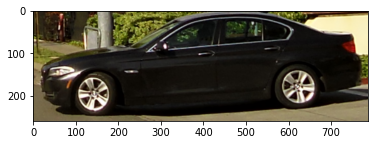

In [13]:
# 以OpenCV檢視輸入影像
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/opt/intel/openvino/deployment_tools/demo/car.png') # 讀入指定彩色影像
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # 將影像從BGR格式轉到RGB格式，才能讓plt.imshow()正確顯示
plt.figure() # 準備一顯示影像空間
plt.imshow(rgb) # 顯示影像

In [14]:
# 建立quticstart.py範例程式
!touch /content/quickstart.py && rm /content/quickstart.py && touch /content/quickstart.py && \
echo "import cv2" >> /content/quickstart.py && \
echo "import numpy as np" >> /content/quickstart.py && \
echo "from openvino.inference_engine import IENetwork, IECore" >> /content/quickstart.py && \
echo "ie = IECore()"  >> /content/quickstart.py && \
echo "net = IENetwork(model='/content/public/mobilenet-v1-1.0-224/FP16/mobilenet-v1-1.0-224.xml', weights='/content/public/mobilenet-v1-1.0-224/FP16/mobilenet-v1-1.0-224.bin')" >> /content/quickstart.py && \
echo "input_blob = next(iter(net.inputs))" >> /content/quickstart.py && \
echo "out_blob = next(iter(net.outputs))" >> /content/quickstart.py && \
echo "batch,channel,height,width  = net.inputs[input_blob].shape" >> /content/quickstart.py && \
echo "image = cv2.imread('/opt/intel/openvino/deployment_tools/demo/car.png')" >> /content/quickstart.py && \
echo "#cv2.imshow("input", image)" >> /content/quickstart.py && \
echo "image = cv2.resize(image, (width, height))" >> /content/quickstart.py && \
echo "image = image.transpose((2, 0, 1))  # Change data layout from HWC to CHW" >> /content/quickstart.py && \
echo "exec_net = ie.load_network(network=net, device_name='CPU')" >> /content/quickstart.py && \
echo "res = exec_net.infer(inputs={input_blob: image})" >> /content/quickstart.py && \
echo "idx = np.argsort(np.squeeze(res[out_blob][0]))[::-1]" >> /content/quickstart.py && \
echo "for i in range(5):" >> /content/quickstart.py && \
echo " print(idx[i]+1, res[out_blob][0][idx[i]])" >> /content/quickstart.py

In [15]:
# 檢視quickstart.py程式碼
!cat /content/quickstart.py

import cv2
import numpy as np
from openvino.inference_engine import IENetwork, IECore
ie = IECore()
net = IENetwork(model='/content/public/mobilenet-v1-1.0-224/FP16/mobilenet-v1-1.0-224.xml', weights='/content/public/mobilenet-v1-1.0-224/FP16/mobilenet-v1-1.0-224.bin')
input_blob = next(iter(net.inputs))
out_blob = next(iter(net.outputs))
batch,channel,height,width  = net.inputs[input_blob].shape
image = cv2.imread('/opt/intel/openvino/deployment_tools/demo/car.png')
#cv2.imshow(input, image)
image = cv2.resize(image, (width, height))
image = image.transpose((2, 0, 1))  # Change data layout from HWC to CHW
exec_net = ie.load_network(network=net, device_name='CPU')
res = exec_net.infer(inputs={input_blob: image})
idx = np.argsort(np.squeeze(res[out_blob][0]))[::-1]
for i in range(5):
 print(idx[i]+1, res[out_blob][0][idx[i]])


In [16]:
# 執行環境設定批次檔並執行影像分類
# 輸出結果 第818類（即car, sport car) 置信度（機率） 0.4242041
!source /opt/intel/openvino/bin/setupvars.sh && \
python /content/quickstart.py

[setupvars.sh] OpenVINO environment initialized
/content/quickstart.py:5: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model='/content/public/mobilenet-v1-1.0-224/FP16/mobilenet-v1-1.0-224.xml', weights='/content/public/mobilenet-v1-1.0-224/FP16/mobilenet-v1-1.0-224.bin')
/content/quickstart.py:6: DeprecationWarning: 'inputs' property of IENetwork class is deprecated. To access DataPtrs user need to use 'input_data' property of InputInfoPtr objects which can be accessed by 'input_info' property.
  input_blob = next(iter(net.inputs))
818 [[0.42420408]]
512 [[0.27280593]]
480 [[0.13300343]]
437 [[0.0699498]]
752 [[0.03396042]]
